In [4]:
import pandas as pd 
import numpy as np 
from scipy import stats
from matplotlib import pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from sklearn.model_selection import GridSearchCV
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from itertools import product
from feature_engine.encoding import CountFrequencyEncoder
from feature_engine.discretisation import EqualFrequencyDiscretiser
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier

In [5]:
locatel = pd.read_csv('C:/Users/Tania/Downloads/base-integrale-140322.csv')

In [6]:
locatel.shape

(1048575, 28)

In [7]:
locatel.head()

,FOLIO,FECHA_ALTA,A�O_ALTA,MES_ALTA,D�A_ALTA,HORA_ALTA,SEXO,EDAD,ESTADO_CIVIL,OCUPACION,...,CP_HECHOS,ORIGEN,SERVICIO,TEMATICA_1,TEMATICA_2,TEMATICA_3,TEMATICA_4,TEMATICA_5,TEMATICA_6,TEMATICA_7
0,3011.0,2016-11-01,2016,11,1,0,MASCULINO,34,CASADO (A),EMPLEADO (A),...,11260.0,ASESOR�A,JUR�DICO,INFORMACION GENERAL,FUNDAMENTOS LEGALES,NaN,NaN,NaN,NaN,NaN
1,3012.0,2016-11-01,2016,11,1,0,FEMENINO,54,SOLTERO (A),EMPLEADO (A),...,NaN,ASESOR�A,JUR�DICO,INFORMACION GENERAL,DEPENDENCIAS ADMINISTRATIVAS,REFERENCIA INSTITUCIONAL,NaN,NaN,NaN,NaN
2,3013.0,2016-11-01,2016,11,1,0,FEMENINO,42,SOLTERO (A),EMPLEADO (A),...,7330.0,ASESOR�A,JUR�DICO,PENAL,DELITOS CONTRA LA LIBERTAD Y LA SEGURIDAD SEXU...,ABUSO SEXUAL,MENORES DE EDAD,NaN,NaN,NaN
3,3014.0,2016-11-01,2016,11,1,1,FEMENINO,40,SOLTERO (A),DESEMPLEADO (A),...,2100.0,ASESOR�A,JUR�DICO,PENAL,DELITOS CONTRA LA INTEGRIDAD FAMILIAR,VIOLENCIA FAMILIAR,NaN,NaN,NaN,NaN
4,3015.0,2016-11-01,2016,11,1,1,FEMENINO,55,SOLTERO (A),EMPLEADO (A),...,NaN,ASESOR�A,JUR�DICO,INFORMACION GENERAL,GARANTIAS DEL GOBERNADO,NaN,NaN,NaN,NaN,NaN


In [8]:
locatel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 28 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   FOLIO              1048571 non-null  float64
 1   FECHA_ALTA         1048575 non-null  object 
 2   A�O_ALTA           1048575 non-null  int64  
 3   MES_ALTA           1048575 non-null  int64  
 4   D�A_ALTA           1048575 non-null  int64  
 5   HORA_ALTA          1048575 non-null  int64  
 6   SEXO               1048575 non-null  object 
 7   EDAD               1048575 non-null  int64  
 8   ESTADO_CIVIL       923588 non-null   object 
 9   OCUPACION          915138 non-null   object 
 10  ESCOLARIDAD        900022 non-null   object 
 11  ESTADO_USUARIA     1048575 non-null  object 
 12  MUNICIPIO_USUARIA  1047465 non-null  object 
 13  COLONIA_USUARIA    1047465 non-null  object 
 14  CP_USUARIA         1048563 non-null  float64
 15  ESTADO_HECHOS      193685 non-nu

In [9]:
locatel.ORIGEN.value_counts()

ASESOR�A              949802
ATENCI�N INMEDIATA     48107
N�MERO 911             41272
BOT�N DE APOYO          8056
CDMX CONTIGO            1338
Name: ORIGEN, dtype: int64

In [10]:
locatel.SEXO.value_counts()

FEMENINO     681637
MASCULINO    366938
Name: SEXO, dtype: int64

In [11]:
locatel.EDAD.isnull().sum()

0

In [12]:
locatel.EDAD.describe()

count    1.048575e+06
mean     4.283153e+01
std      1.374358e+01
min      1.000000e+00
25%      3.300000e+01
50%      4.200000e+01
75%      5.200000e+01
max      9.900000e+01
Name: EDAD, dtype: float64

(array([   778.,  33525., 178055., 286860., 228893., 187727.,  91922.,
         33716.,   6642.,    457.]),
 array([ 1. , 10.8, 20.6, 30.4, 40.2, 50. , 59.8, 69.6, 79.4, 89.2, 99. ]),
 <BarContainer object of 10 artists>)

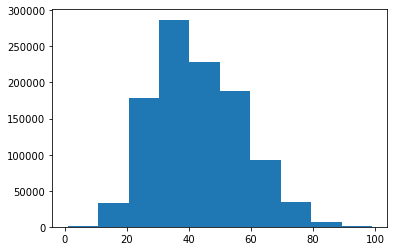

In [13]:
plt.hist(locatel.EDAD)

In [14]:
locatel.ESTADO_CIVIL.isnull().sum()

124987

In [15]:
locatel.ESTADO_CIVIL.value_counts()

SOLTERO (A)    566846
CASADO (A)     278944
UNI�N LIBRE     71516
CONCUBINATO      6282
Name: ESTADO_CIVIL, dtype: int64

In [16]:
locatel.ESCOLARIDAD.isnull().sum()

148553

In [17]:
locatel.ESCOLARIDAD.value_counts()

BACHILLERATO       360719
SECUNDARIA         259393
LICENCIATURA       178396
PRIMARIA            58954
SIN ESCOLARIDAD     26824
MAESTRIA            13125
DOCTORADO            2611
Name: ESCOLARIDAD, dtype: int64

In [18]:
locatel.ESTADO_CIVIL.isnull().sum()/locatel.shape[0]

0.11919700545979067

In [19]:
locatel.SERVICIO.value_counts()

JUR�DICO       525869
PSICOL�GICO    326435
M�DICO         196271
Name: SERVICIO, dtype: int64

In [20]:
locatel.TEMATICA_1.value_counts()

CONFLICTOS EMOCIONALES        162602
PENAL                         135263
FAMILIAR                      112173
INFORMACION GENERAL           102492
ADMINISTRATIVA                 62748
                               ...  
MANIOBRAS                        163
EMBARAZO                         161
INFARTO AGUDO AL MIOCARDIO        88
CRISIS NEUROCONVERSIVA            71
URGENCIAS Y EMERGENCIAS           11
Name: TEMATICA_1, Length: 66, dtype: int64

In [21]:
locatel.TEMATICA_1.nunique()

66

In [22]:
locatel.TEMATICA_1.isnull().sum()

0

In [23]:
locatel.TEMATICA_2.value_counts()

ESTADOS DE ANIMO                         55437
DELITOS CONTRA EL PATRIMONIO             48453
ESTADOS EMOCIONALES                      37924
DELITOS CONTRA LA INTEGRIDAD FAMILIAR    33352
DERECHOS Y OBLIGACIONES                  31057
                                         ...  
PRODUCTO DE LIMPIEZA                         3
PEARCING                                     2
CHAGAS                                       1
TORCH                                        1
BOTULISMO                                    1
Name: TEMATICA_2, Length: 371, dtype: int64

In [24]:
locatel.TEMATICA_2.nunique()

371

In [25]:
locatel.TEMATICA_2.isnull().sum()

25109

In [26]:
locatel.TEMATICA_3.value_counts()

URGENCIAS Y EMERGENCIAS      138704
ESCUCHA                       62226
REFERENCIA INSTITUCIONAL      51173
ENFRENTAR SITUACION           43281
VIOLENCIA FAMILIAR            31177
                              ...  
COLPOSCOPIA                       1
GASTROFILIA                       1
ACTIVIDAD ESCOLAR                 1
SABOTAJE                          1
RELACION CINTURA / CADERA         1
Name: TEMATICA_3, Length: 569, dtype: int64

In [27]:
locatel.TEMATICA_3.nunique()

569

In [28]:
locatel.TEMATICA_3.isnull().sum()

153918

In [29]:
locatel.TEMATICA_3.value_counts()

URGENCIAS Y EMERGENCIAS      138704
ESCUCHA                       62226
REFERENCIA INSTITUCIONAL      51173
ENFRENTAR SITUACION           43281
VIOLENCIA FAMILIAR            31177
                              ...  
COLPOSCOPIA                       1
GASTROFILIA                       1
ACTIVIDAD ESCOLAR                 1
SABOTAJE                          1
RELACION CINTURA / CADERA         1
Name: TEMATICA_3, Length: 569, dtype: int64

In [30]:
locatel.FECHA_ALTA.min()

'2016-11-01'

In [31]:
locatel.FECHA_ALTA.max()

'2022-02-13'

In [32]:
locatel["FECHA_ALTA"] = pd.to_datetime(locatel["FECHA_ALTA"])

In [33]:
llamadas=locatel[["FECHA_ALTA","FOLIO"]]

In [34]:
num_llamadas = llamadas.groupby("FECHA_ALTA").count()

In [35]:
num_llamadas.head()

,FOLIO
FECHA_ALTA,
2016-11-01,144
2016-11-02,137
2016-11-03,233
2016-11-04,321
2016-11-05,233


In [36]:
num_llamadas.shape

(1926, 1)

<AxesSubplot:xlabel='FECHA_ALTA'>

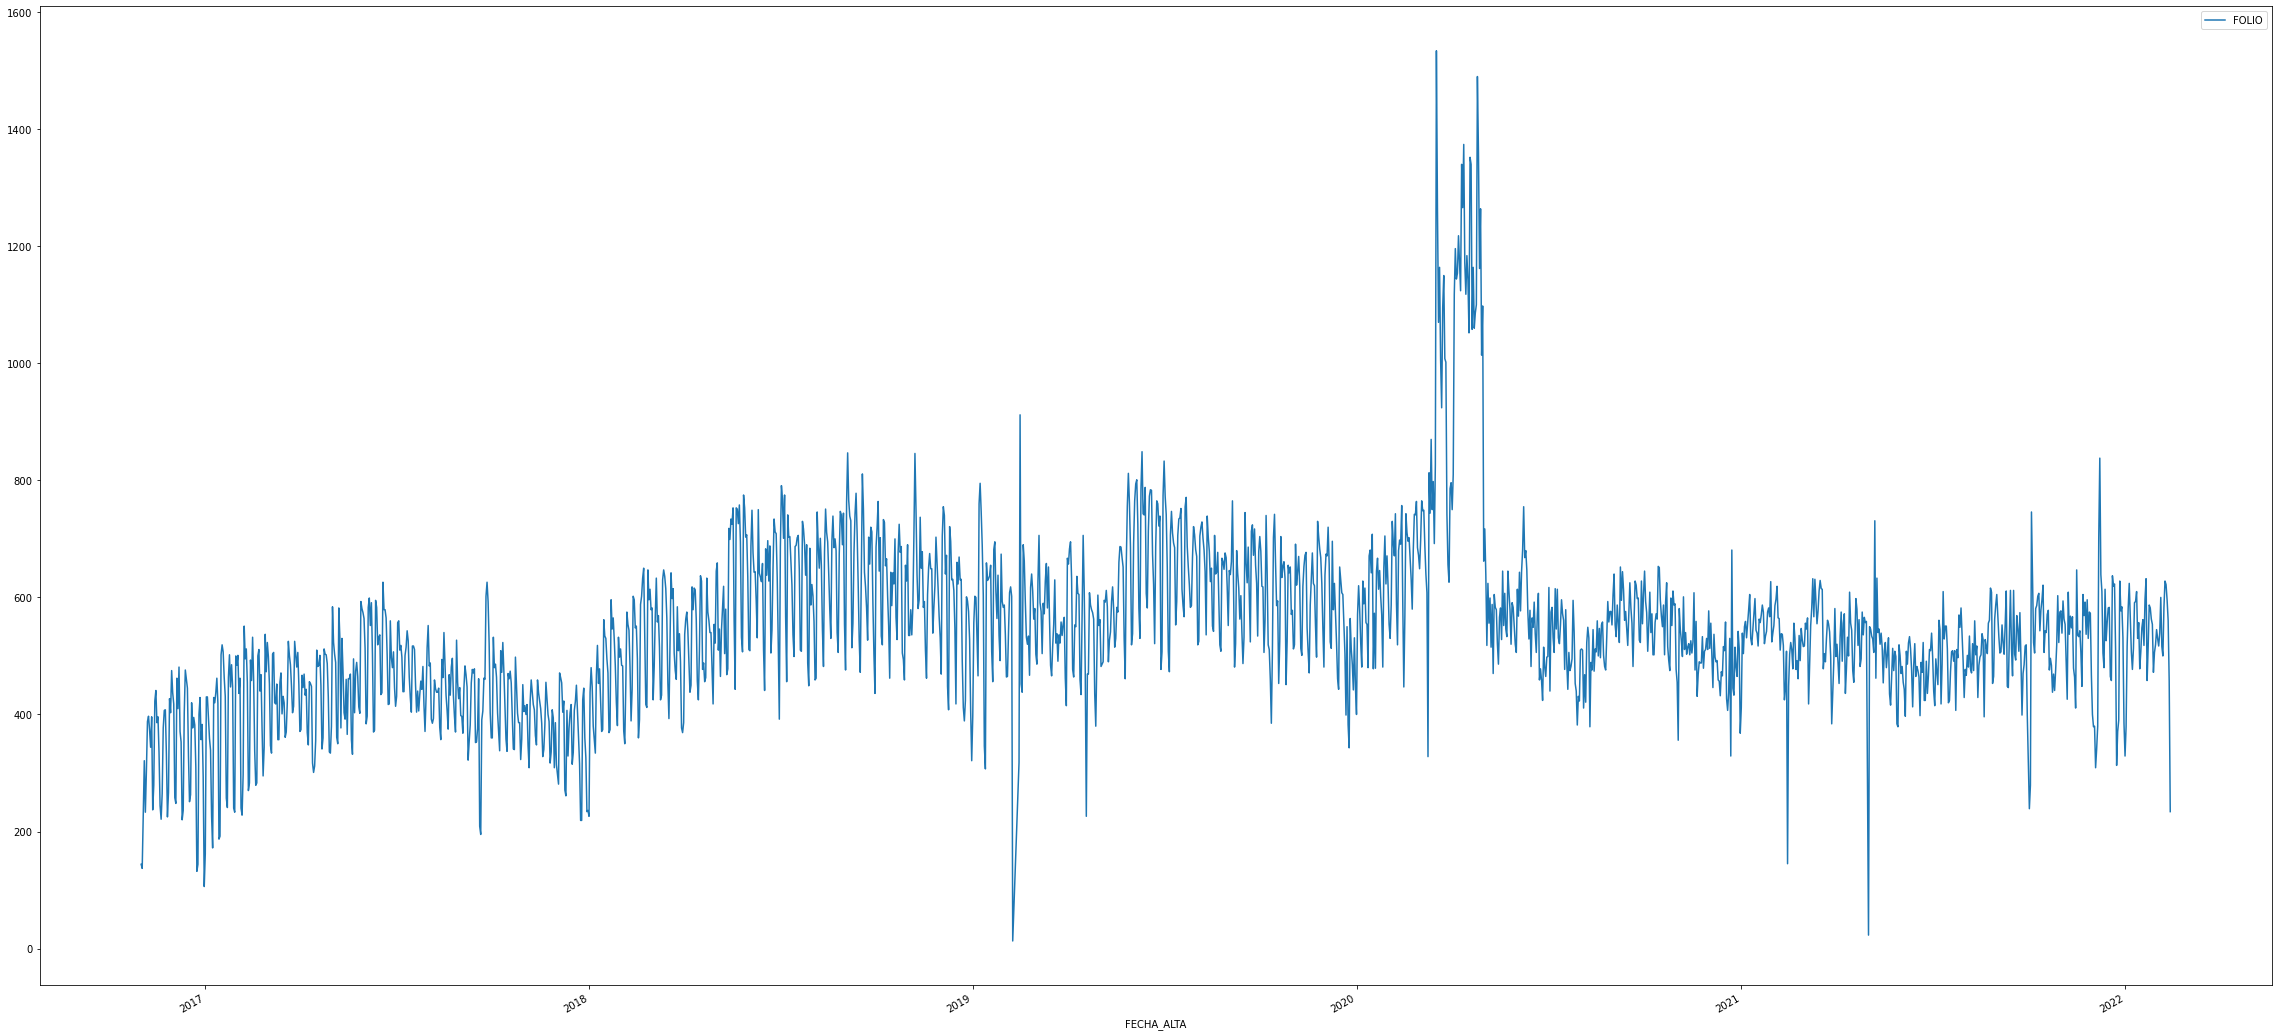

In [37]:
num_llamadas.plot(figsize=(40,20))

In [38]:
locatel.shape

(1048575, 28)

In [39]:
locatel.FECHA_ALTA.nunique()

1926

**Tomaremos otra base de datos sobre el covid que nos ayudara a la serie de tiempo**

In [40]:
restricciones = pd.read_csv('C:/Users/Tania/Downloads/covid-stringency-index.csv')

In [41]:
restricciones.head()

,Entity,Code,Day,stringency_index
0,Afghanistan,AFG,2020-01-21,0.0
1,Afghanistan,AFG,2020-01-22,0.0
2,Afghanistan,AFG,2020-01-23,0.0
3,Afghanistan,AFG,2020-01-24,0.0
4,Afghanistan,AFG,2020-01-25,0.0


In [42]:
rest=restricciones[restricciones.Code=="MEX"]

In [43]:
rest.head()

,Entity,Code,Day,stringency_index
85377,Mexico,MEX,2020-01-21,0.0
85378,Mexico,MEX,2020-01-22,0.0
85379,Mexico,MEX,2020-01-23,0.0
85380,Mexico,MEX,2020-01-24,0.0
85381,Mexico,MEX,2020-01-25,0.0


In [44]:
rest1=rest[["Day","stringency_index"]]

In [109]:
rest1

,Day,stringency_index
85377,2020-01-21,0.00
85378,2020-01-22,0.00
85379,2020-01-23,0.00
85380,2020-01-24,0.00
85381,2020-01-25,0.00
...,...,...
86162,2022-03-16,35.19
86163,2022-03-17,35.19
86164,2022-03-18,35.19
86165,2022-03-19,35.19


In [110]:
rest1["Day"] = pd.to_datetime(rest1["Day"])

<ipython-input-110-e6a798433f00>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rest1["Day"] = pd.to_datetime(rest1["Day"])


In [111]:
locatel_rest=pd.merge(locatel, rest1, how='left', left_on="FECHA_ALTA", right_on="Day")

In [112]:
locatel_rest.stringency_index=locatel_rest.stringency_index.fillna(0)

In [113]:
locatel_rest

,FOLIO,FECHA_ALTA,A�O_ALTA,MES_ALTA,D�A_ALTA,HORA_ALTA,SEXO,EDAD,ESTADO_CIVIL,OCUPACION,...,SERVICIO,TEMATICA_1,TEMATICA_2,TEMATICA_3,TEMATICA_4,TEMATICA_5,TEMATICA_6,TEMATICA_7,Day,stringency_index
0,3011.0,2016-11-01,2016,11,1,0,MASCULINO,34,CASADO (A),EMPLEADO (A),...,JUR�DICO,INFORMACION GENERAL,FUNDAMENTOS LEGALES,NaN,NaN,NaN,NaN,NaN,NaT,0.00
1,3012.0,2016-11-01,2016,11,1,0,FEMENINO,54,SOLTERO (A),EMPLEADO (A),...,JUR�DICO,INFORMACION GENERAL,DEPENDENCIAS ADMINISTRATIVAS,REFERENCIA INSTITUCIONAL,NaN,NaN,NaN,NaN,NaT,0.00
2,3013.0,2016-11-01,2016,11,1,0,FEMENINO,42,SOLTERO (A),EMPLEADO (A),...,JUR�DICO,PENAL,DELITOS CONTRA LA LIBERTAD Y LA SEGURIDAD SEXU...,ABUSO SEXUAL,MENORES DE EDAD,NaN,NaN,NaN,NaT,0.00
3,3014.0,2016-11-01,2016,11,1,1,FEMENINO,40,SOLTERO (A),DESEMPLEADO (A),...,JUR�DICO,PENAL,DELITOS CONTRA LA INTEGRIDAD FAMILIAR,VIOLENCIA FAMILIAR,NaN,NaN,NaN,NaN,NaT,0.00
4,3015.0,2016-11-01,2016,11,1,1,FEMENINO,55,SOLTERO (A),EMPLEADO (A),...,JUR�DICO,INFORMACION GENERAL,GARANTIAS DEL GOBERNADO,NaN,NaN,NaN,NaN,NaN,NaT,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,1055690.0,2022-02-13,2022,2,13,15,FEMENINO,29,CASADO (A),COMERCIANTE,...,JUR�DICO,PENAL,DELITOS CONTRA LA INTEGRIDAD FAMILIAR,VIOLENCIA FAMILIAR,MAYORES DE EDAD,NaN,NaN,NaN,2022-02-13,35.19
1048571,1055691.0,2022-02-13,2022,2,13,15,FEMENINO,46,CASADO (A),EMPLEADO (A),...,JUR�DICO,FAMILIAR,SUCESIONES,INTESTAMENTARIA,NaN,NaN,NaN,NaN,2022-02-13,35.19
1048572,1055692.0,2022-02-13,2022,2,13,15,FEMENINO,28,CASADO (A),HOGAR,...,JUR�DICO,PENAL,DELITOS CONTRA LA INTEGRIDAD FAMILIAR,VIOLENCIA FAMILIAR,MAYORES DE EDAD,NaN,NaN,NaN,2022-02-13,35.19
1048573,1055693.0,2022-02-13,2022,2,13,15,MASCULINO,20,SOLTERO (A),DESEMPLEADO (A),...,PSICOL�GICO,CONFLICTOS EMOCIONALES,ESTADOS DE ANIMO,ENFRENTAR SITUACION,NaN,NaN,NaN,NaN,2022-02-13,35.19


In [49]:
llamadas=locatel_rest[["FECHA_ALTA","FOLIO"]]

In [50]:
llamadas_viol=llamadas.groupby("FECHA_ALTA").count()

In [51]:
llamadas_viol

,FOLIO
FECHA_ALTA,
2016-11-01,144
2016-11-02,137
2016-11-03,233
2016-11-04,321
2016-11-05,233
...,...
2022-02-09,622
2022-02-10,596
2022-02-11,561


In [52]:
rest_vio=locatel_rest[locatel_rest.TEMATICA_1=="VIOLENCIA"]

In [53]:
rest_viol=rest_vio[["FECHA_ALTA","stringency_index"]]

In [54]:
rest_viol.index=rest_viol.FECHA_ALTA

In [55]:
rest_viol.drop("FECHA_ALTA",axis=1,inplace=True)

C:\Users\Tania\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


<AxesSubplot:xlabel='FECHA_ALTA'>

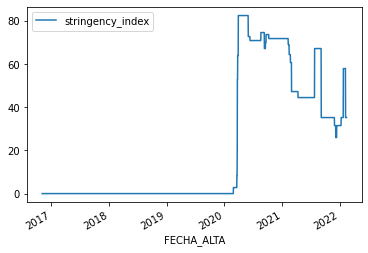

In [56]:
rest_viol.plot()

In [57]:
rest_viol.shape

(38670, 1)

In [58]:
rest_viol_d=rest_viol.resample("D").mean()

<AxesSubplot:xlabel='FECHA_ALTA'>

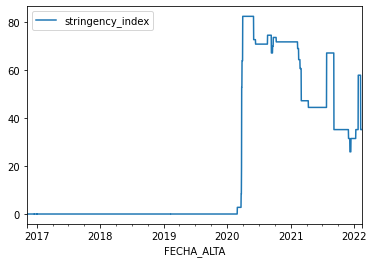

In [59]:
rest_viol_d.plot()

In [60]:
rest_viol_d

,stringency_index
FECHA_ALTA,
2016-11-04,0.00
2016-11-05,0.00
2016-11-06,0.00
2016-11-07,0.00
2016-11-08,0.00
...,...
2022-02-09,35.19
2022-02-10,35.19
2022-02-11,35.19


In [61]:
llamadas_viol

,FOLIO
FECHA_ALTA,
2016-11-01,144
2016-11-02,137
2016-11-03,233
2016-11-04,321
2016-11-05,233
...,...
2022-02-09,622
2022-02-10,596
2022-02-11,561


In [62]:
locatel_rest=pd.merge(rest_viol_d, llamadas_viol, how='left', left_index=True, right_index=True)

In [63]:
locatel_rest

,stringency_index,FOLIO
FECHA_ALTA,,
2016-11-04,0.00,321.0
2016-11-05,0.00,233.0
2016-11-06,0.00,304.0
2016-11-07,0.00,388.0
2016-11-08,0.00,397.0
...,...,...
2022-02-09,35.19,622.0
2022-02-10,35.19,596.0
2022-02-11,35.19,561.0


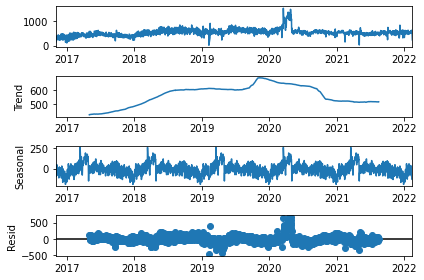

In [64]:
decomp_add1 = sm.tsa.seasonal_decompose(num_llamadas, period=365)
decomp_add1.plot()
plt.show()

In [82]:
num_llamadas.sort_values(by="FOLIO", ascending=False)

,FOLIO
FECHA_ALTA,
2020-03-17,1534
2020-04-25,1490
2020-04-12,1374
2020-04-26,1360
2020-04-18,1352
...,...
2016-11-02,137
2016-12-24,132
2016-12-31,106


In [66]:
prom_llam_dm=num_llamadas.resample("MS").mean()

In [100]:
llam_a=num_llamadas[:"2020-03-10"]

In [101]:
llam_a

,FOLIO
FECHA_ALTA,
2016-11-01,144
2016-11-02,137
2016-11-03,233
2016-11-04,321
2016-11-05,233
...,...
2020-03-06,688
2020-03-07,640
2020-03-08,608


In [102]:
llam_a.FOLIO.mean()

532.8312858312859

In [98]:
prom_pico=num_llamadas["2020-03-11":"2020-05-01"]

In [99]:
prom_pico.FOLIO.mean()

1058.6346153846155

In [103]:
prom_d=num_llamadas["2020-05-02":]

In [104]:
prom_d

,FOLIO
FECHA_ALTA,
2020-05-02,717
2020-05-03,639
2020-05-04,518
2020-05-05,624
2020-05-06,556
...,...
2022-02-09,622
2022-02-10,596
2022-02-11,561


In [86]:
prom_d.FOLIO.mean()

525.1684532924962

<AxesSubplot:xlabel='FECHA_ALTA'>

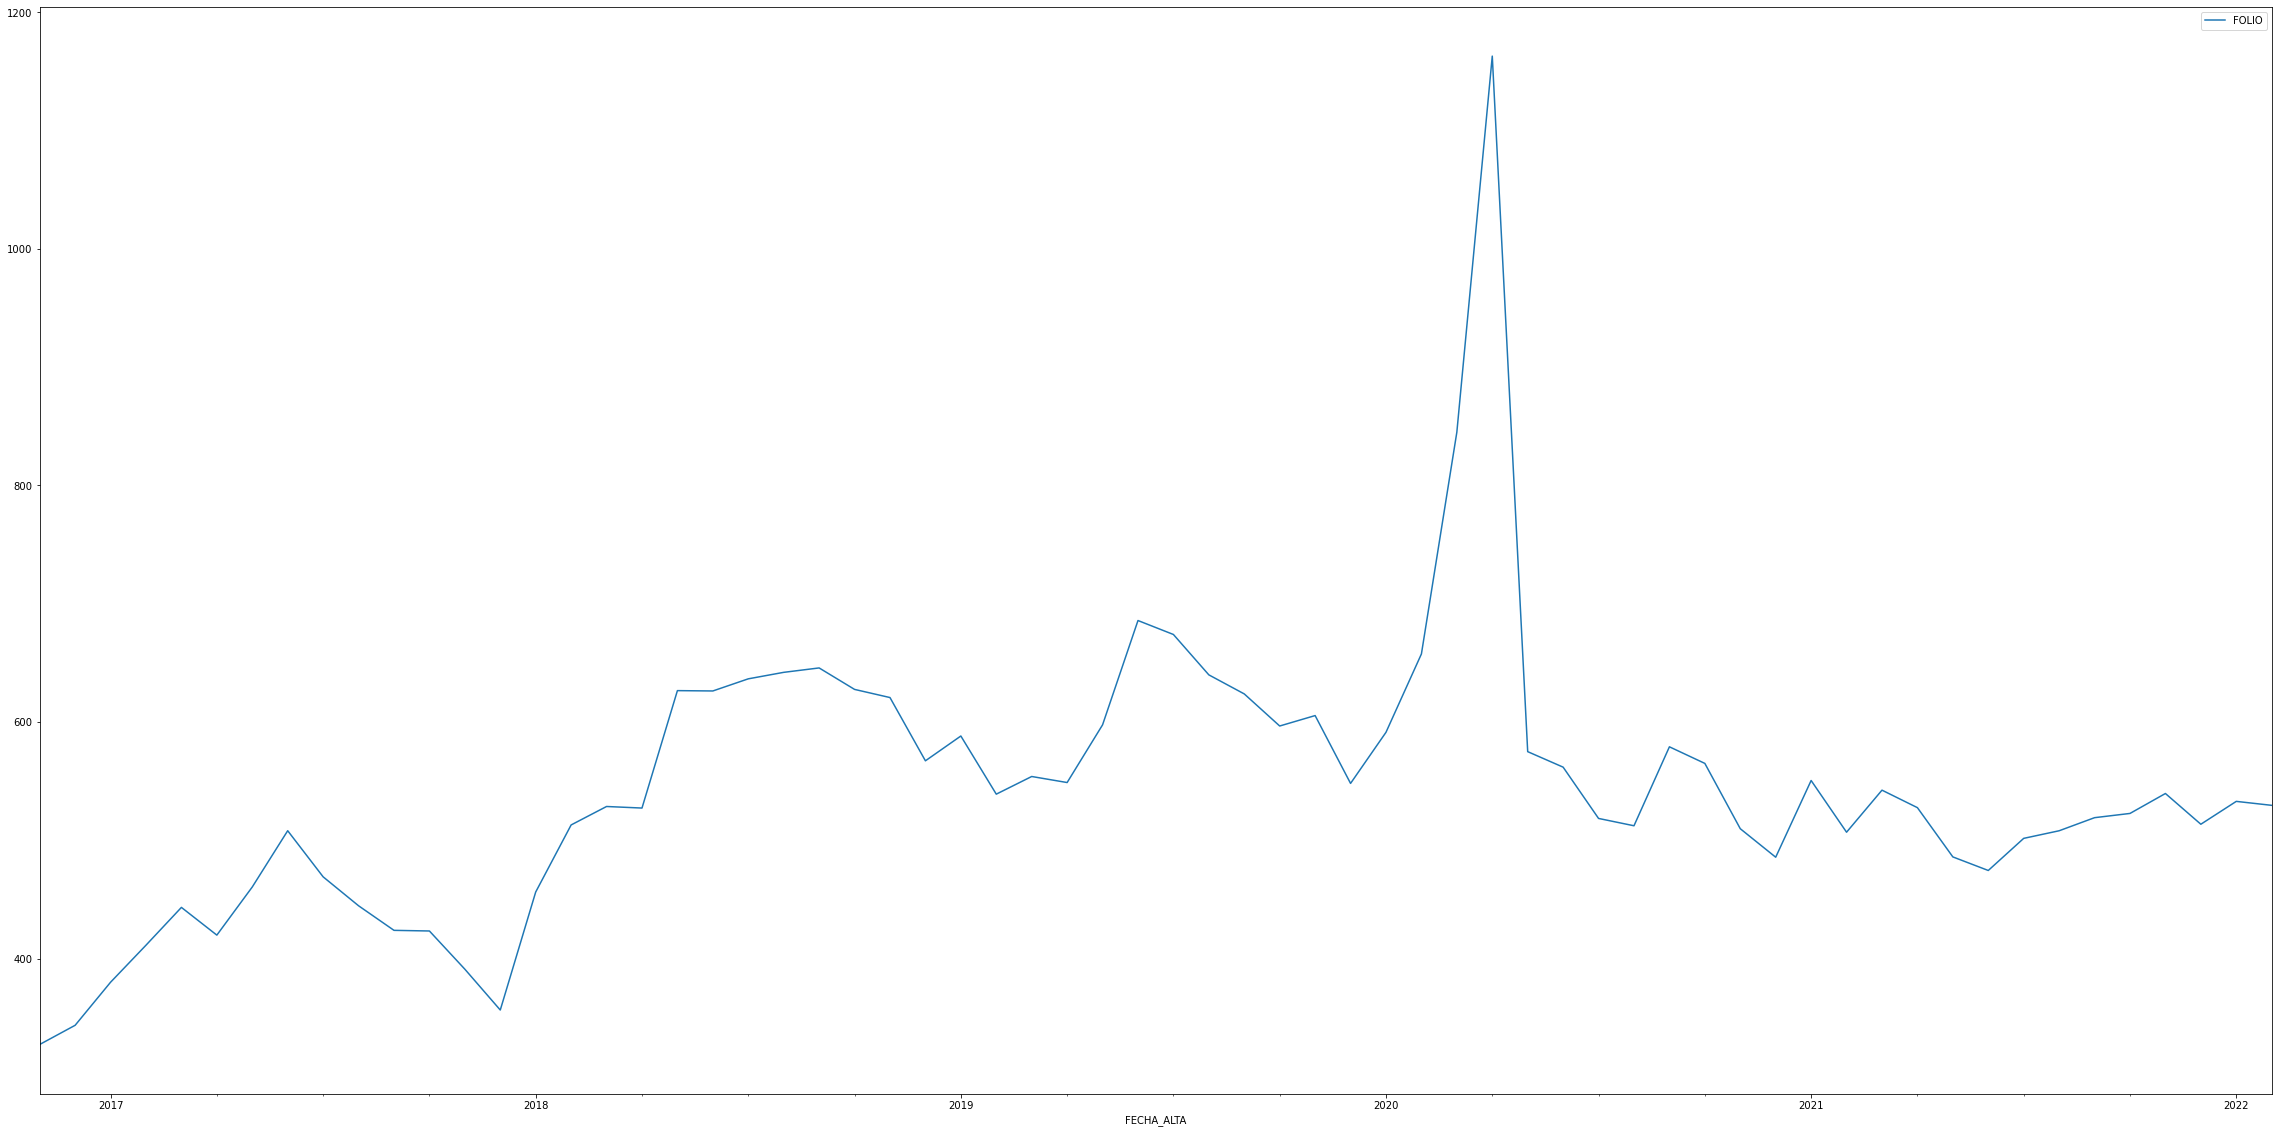

In [38]:
prom_llam_dm.plot(figsize=(40,20))

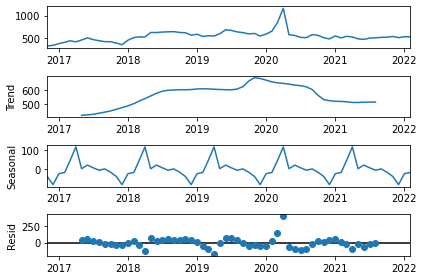

In [39]:
decomp_add = sm.tsa.seasonal_decompose(prom_llam_dm)
decomp_add.plot()
plt.show()

In [40]:
resultado = adfuller(prom_llam_dm.FOLIO)

In [41]:
resultado

(-3.699849297870197,
 0.004115274398560488,
 0,
 63,
 {'1%': -3.5386953618719676,
  '5%': -2.9086446751210775,
  '10%': -2.591896782564878},
 621.1618096564672)

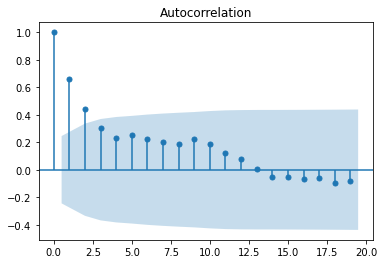

In [42]:
#q
auto_corr = plot_acf(prom_llam_dm)

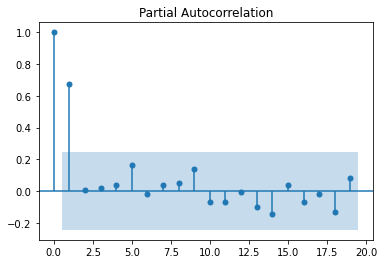

In [43]:
#p
partial_auto_corr = plot_pacf(prom_llam_dm)

In [44]:
prom_llam_dms=decomp_add.seasonal

<AxesSubplot:xlabel='FECHA_ALTA'>

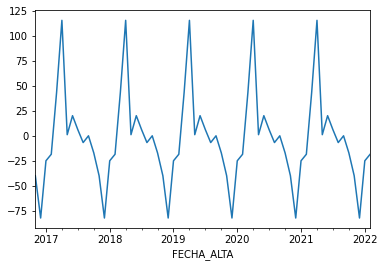

In [45]:
prom_llam_dms.plot()

In [46]:
resultado1 = adfuller(prom_llam_dms)

In [47]:
resultado1

(-3262428739833696.0,
 0.0,
 11,
 52,
 {'1%': -3.562878534649522,
  '5%': -2.918973284023669,
  '10%': -2.597393446745562},
 -2991.487213804688)

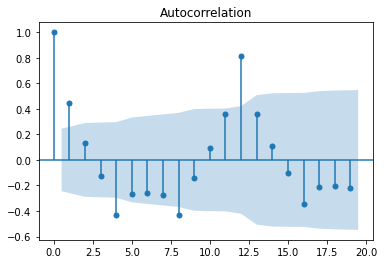

In [48]:
#Q
auto_corr = plot_acf(prom_llam_dms)

C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


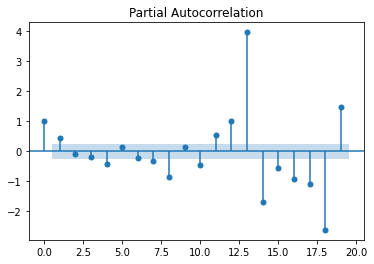

In [49]:
#P
partial_auto_corr = plot_pacf(prom_llam_dms)

In [50]:
p= range(0,4)
d= range(0,1)
q= range(0,5)

In [51]:
pdq = list(product(p, d, q))
seasonal_pdq = [(p, d, q, 12) for p,d,q in pdq]

In [7]:
pdq

[(0, 0, 0),
 (0, 0, 5),
 (1, 0, 0),
 (1, 0, 5),
 (2, 0, 0),
 (2, 0, 5),
 (3, 0, 0),
 (3, 0, 5)]

In [52]:
best_aic = None
for param in pdq:
    for param_estacional in seasonal_pdq:
        try:
            modelo = sm.tsa.statespace.SARIMAX(prom_llam_dm.FOLIO,
                                         order = param,
                                         seasonal_order = param_estacional,
                                         enforce_stationarity = False,
                                         enforce_invertibility = False)
            resultado = modelo.fit()
            if best_aic is None:
                print(f'SARIMAX:{param} x {param_estacional} - AIC:{resultado.aic}')
                best_aic = resultado.aic
            elif resultado.aic < best_aic:
                print(f'SARIMAX:{param} x {param_estacional} - AIC:{resultado.aic}')
                best_aic = resultado.aic
        except Exception as e:
            pass

SARIMAX:(0, 0, 0) x (0, 0, 0, 12) - AIC:978.123492187951
SARIMAX:(0, 0, 0) x (0, 0, 1, 12) - AIC:757.7838416232948


C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMAX:(0, 0, 0) x (0, 0, 2, 12) - AIC:569.1797404853972
SARIMAX:(0, 0, 0) x (0, 0, 3, 12) - AIC:394.49675579219826


C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX:(0, 0, 0) x (0, 0, 4, 12) - AIC:226.3504574818322


C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX:(0, 0, 0) x (1, 0, 4, 12) - AIC:200.16066158097115


C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX:(0, 0, 0) x (2, 0, 4, 12) - AIC:165.414810653753


C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX:(0, 0, 0) x (3, 0, 4, 12) - AIC:165.32144759572932


C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximu

SARIMAX:(0, 0, 1) x (2, 0, 4, 12) - AIC:153.24000049453545


C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximu

SARIMAX:(0, 0, 2) x (2, 0, 4, 12) - AIC:142.88810678322537


C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximu

SARIMAX:(0, 0, 3) x (2, 0, 4, 12) - AIC:136.59773209440868


C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximu

SARIMAX:(0, 0, 4) x (2, 0, 4, 12) - AIC:126.35595106296333


C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX:(0, 0, 4) x (3, 0, 4, 12) - AIC:123.45615201086252


C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximu

SARIMAX:(1, 0, 3) x (0, 0, 4, 12) - AIC:121.85026646683588


C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX:(1, 0, 3) x (1, 0, 4, 12) - AIC:118.26618007307817


C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximu

SARIMAX:(1, 0, 4) x (0, 0, 4, 12) - AIC:113.06700672497188


C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX:(1, 0, 4) x (1, 0, 4, 12) - AIC:112.38139842216546


C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximu

C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximu

C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximu

C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximu

C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximu

**Serie de tiempo llamadas de violencia** 

In [53]:
locatel.columns

Index(['FOLIO', 'FECHA_ALTA', 'A�O_ALTA', 'MES_ALTA', 'D�A_ALTA', 'HORA_ALTA',
       'SEXO', 'EDAD', 'ESTADO_CIVIL', 'OCUPACION', 'ESCOLARIDAD',
       'ESTADO_USUARIA', 'MUNICIPIO_USUARIA', 'COLONIA_USUARIA', 'CP_USUARIA',
       'ESTADO_HECHOS', 'MUNICIPIO_HECHOS', 'COLONIA_HECHOS', 'CP_HECHOS',
       'ORIGEN', 'SERVICIO', 'TEMATICA_1', 'TEMATICA_2', 'TEMATICA_3',
       'TEMATICA_4', 'TEMATICA_5', 'TEMATICA_6', 'TEMATICA_7'],
      dtype='object')

In [55]:
locatel.TEMATICA_1.unique()

array(['INFORMACION GENERAL', 'PENAL', 'LABORAL', 'FAMILIAR',
       'ADMINISTRATIVA', 'CIVIL', 'ARRENDAMIENTO', 'MERCANTIL',
       'SEGURIDAD SOCIAL', 'NOTARIAL', 'FISCAL', 'INSTITUCIONES',
       'ORTOPEDIA Y TRAUMATOLOGIA', 'CONFLICTOS EMOCIONALES',
       'MEDICAMENTOS', 'SIGNOS Y SINTOMAS GENERALES', 'CIRUGIA',
       'CARDIOLOGIA', 'ADICCIONES', 'GINECOLOGIA OBSTETRICIA',
       'TOXICOLOGIA', 'NOVIAZGO', 'GASTROENTEROLOGIA',
       'OTORRINOLARINGOLOGIA', 'ODONTOLOGIA', 'SEXUALIDAD', 'PAREJA',
       'VIOLENCIA', 'FAMILIA', 'INFECTOLOGIA', 'EXAMENES DE LABORATORIO',
       'PSIQUIATRIA', 'SALUD SEXUAL Y REPRODUCTIVA', 'ENDOCRINOLOGIAS',
       'MEDICINA PREVENTIVA', 'NEUROLOGIA', 'OFTALMOLOGIA',
       'DERMATOLOGIA', 'SALUD', 'NEUMOLOGIA', 'ALERGOLOGIA', 'ESCOLAR',
       'UROLOGIA', 'CIRCULATORIO', 'NUTRICION', 'HEMATOLOGIA',
       'SERVICIOS DEL �REA', 'ONCOLOGIA', 'GRUPO DE PARES',
       'ENFERMEADES ENDEMICAS', 'REUMATOLOGIA', 'NEONATOLOGIA',
       'MATERIAL MEDICO', 'D

In [106]:
violencia=locatel[locatel.TEMATICA_1=="VIOLENCIA"]

In [107]:
llamadas_vio=violencia[["FECHA_ALTA","FOLIO"]]

In [108]:
num_llamadas_vio = llamadas_vio.groupby("FECHA_ALTA").count()

In [ ]:
num_llamadas_vio[]

<AxesSubplot:xlabel='FECHA_ALTA'>

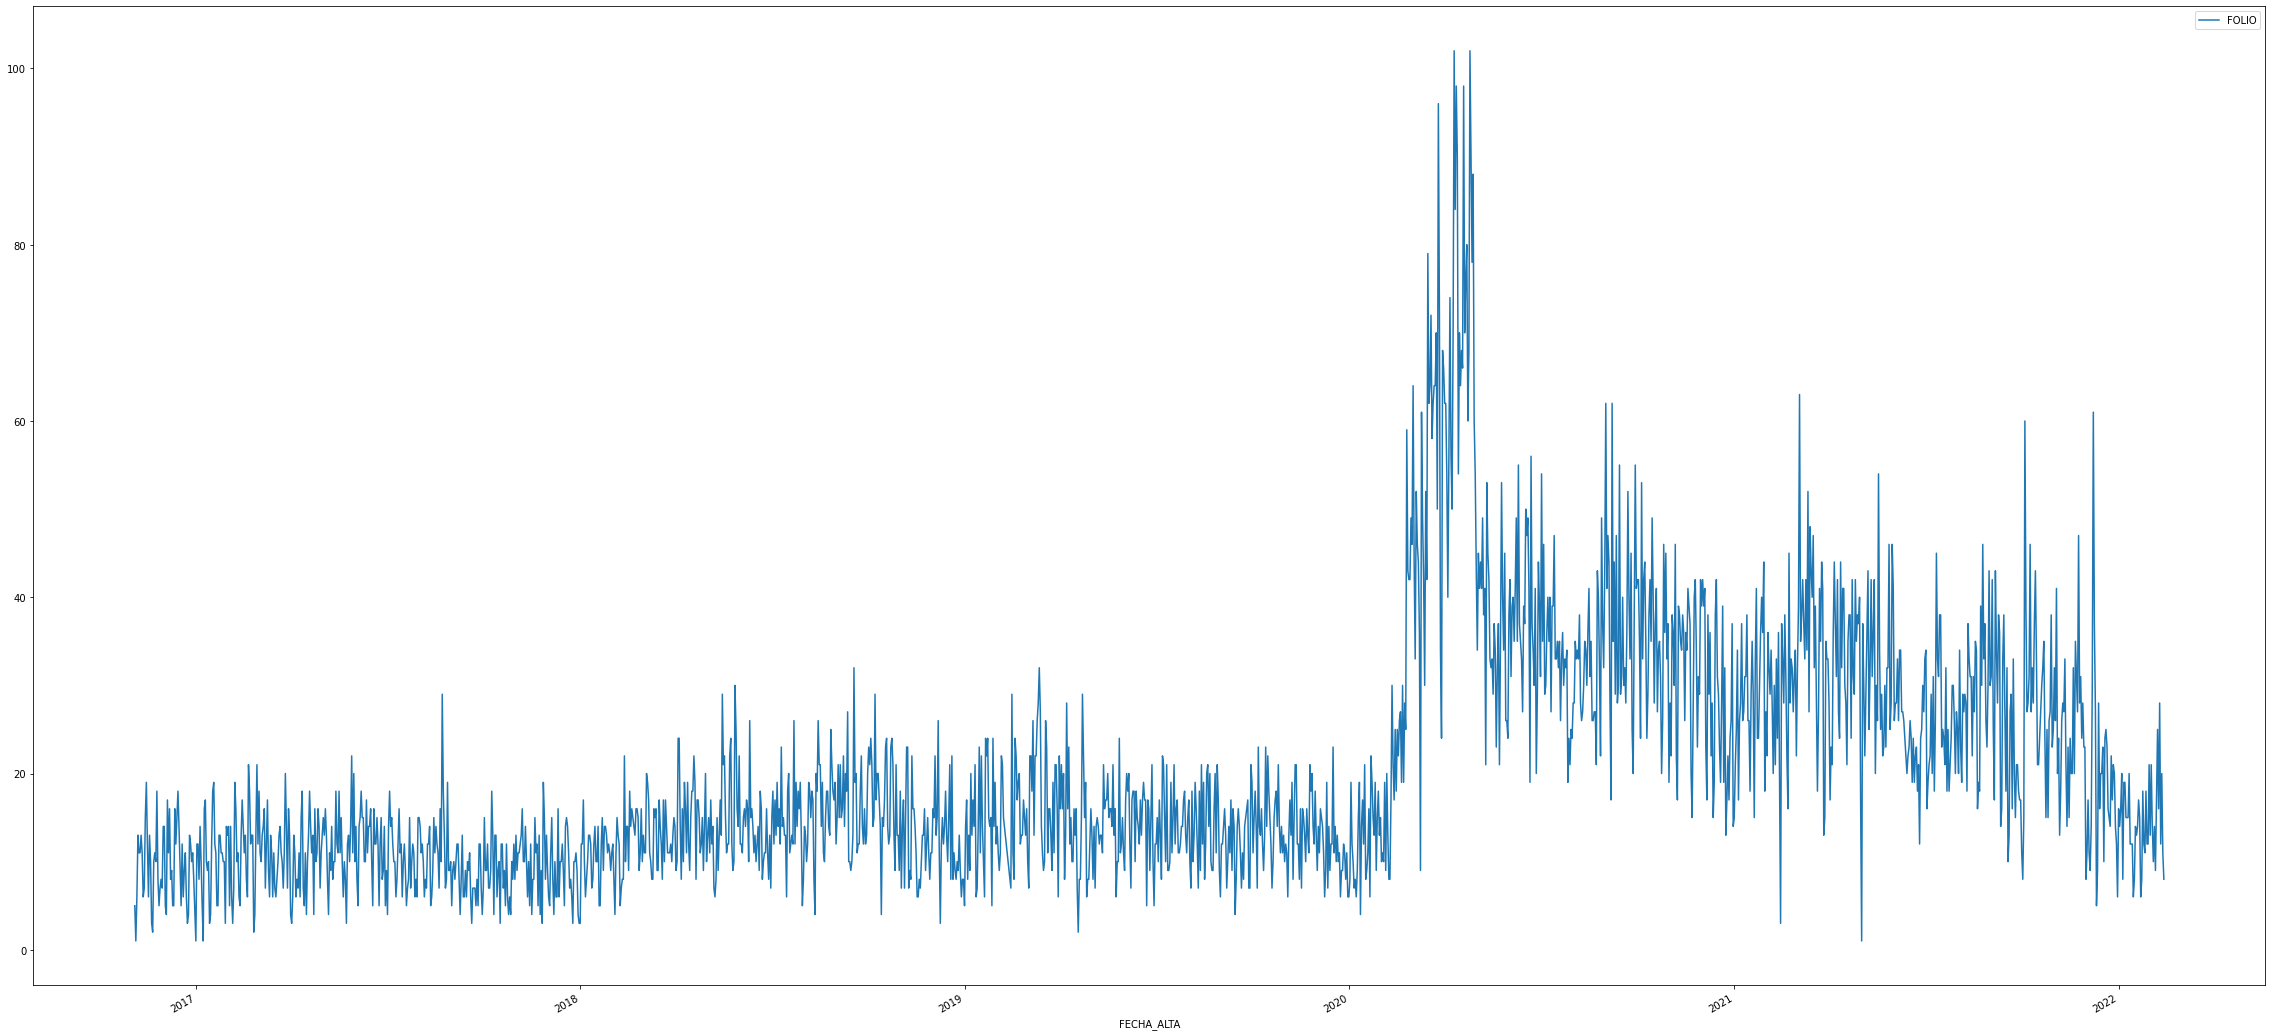

In [63]:
num_llamadas_vio.plot(figsize=(40,20))

In [64]:
prom_llam_dm_vio=num_llamadas_vio.resample("MS").mean()
prom_llam_dm_vio

<AxesSubplot:xlabel='FECHA_ALTA'>

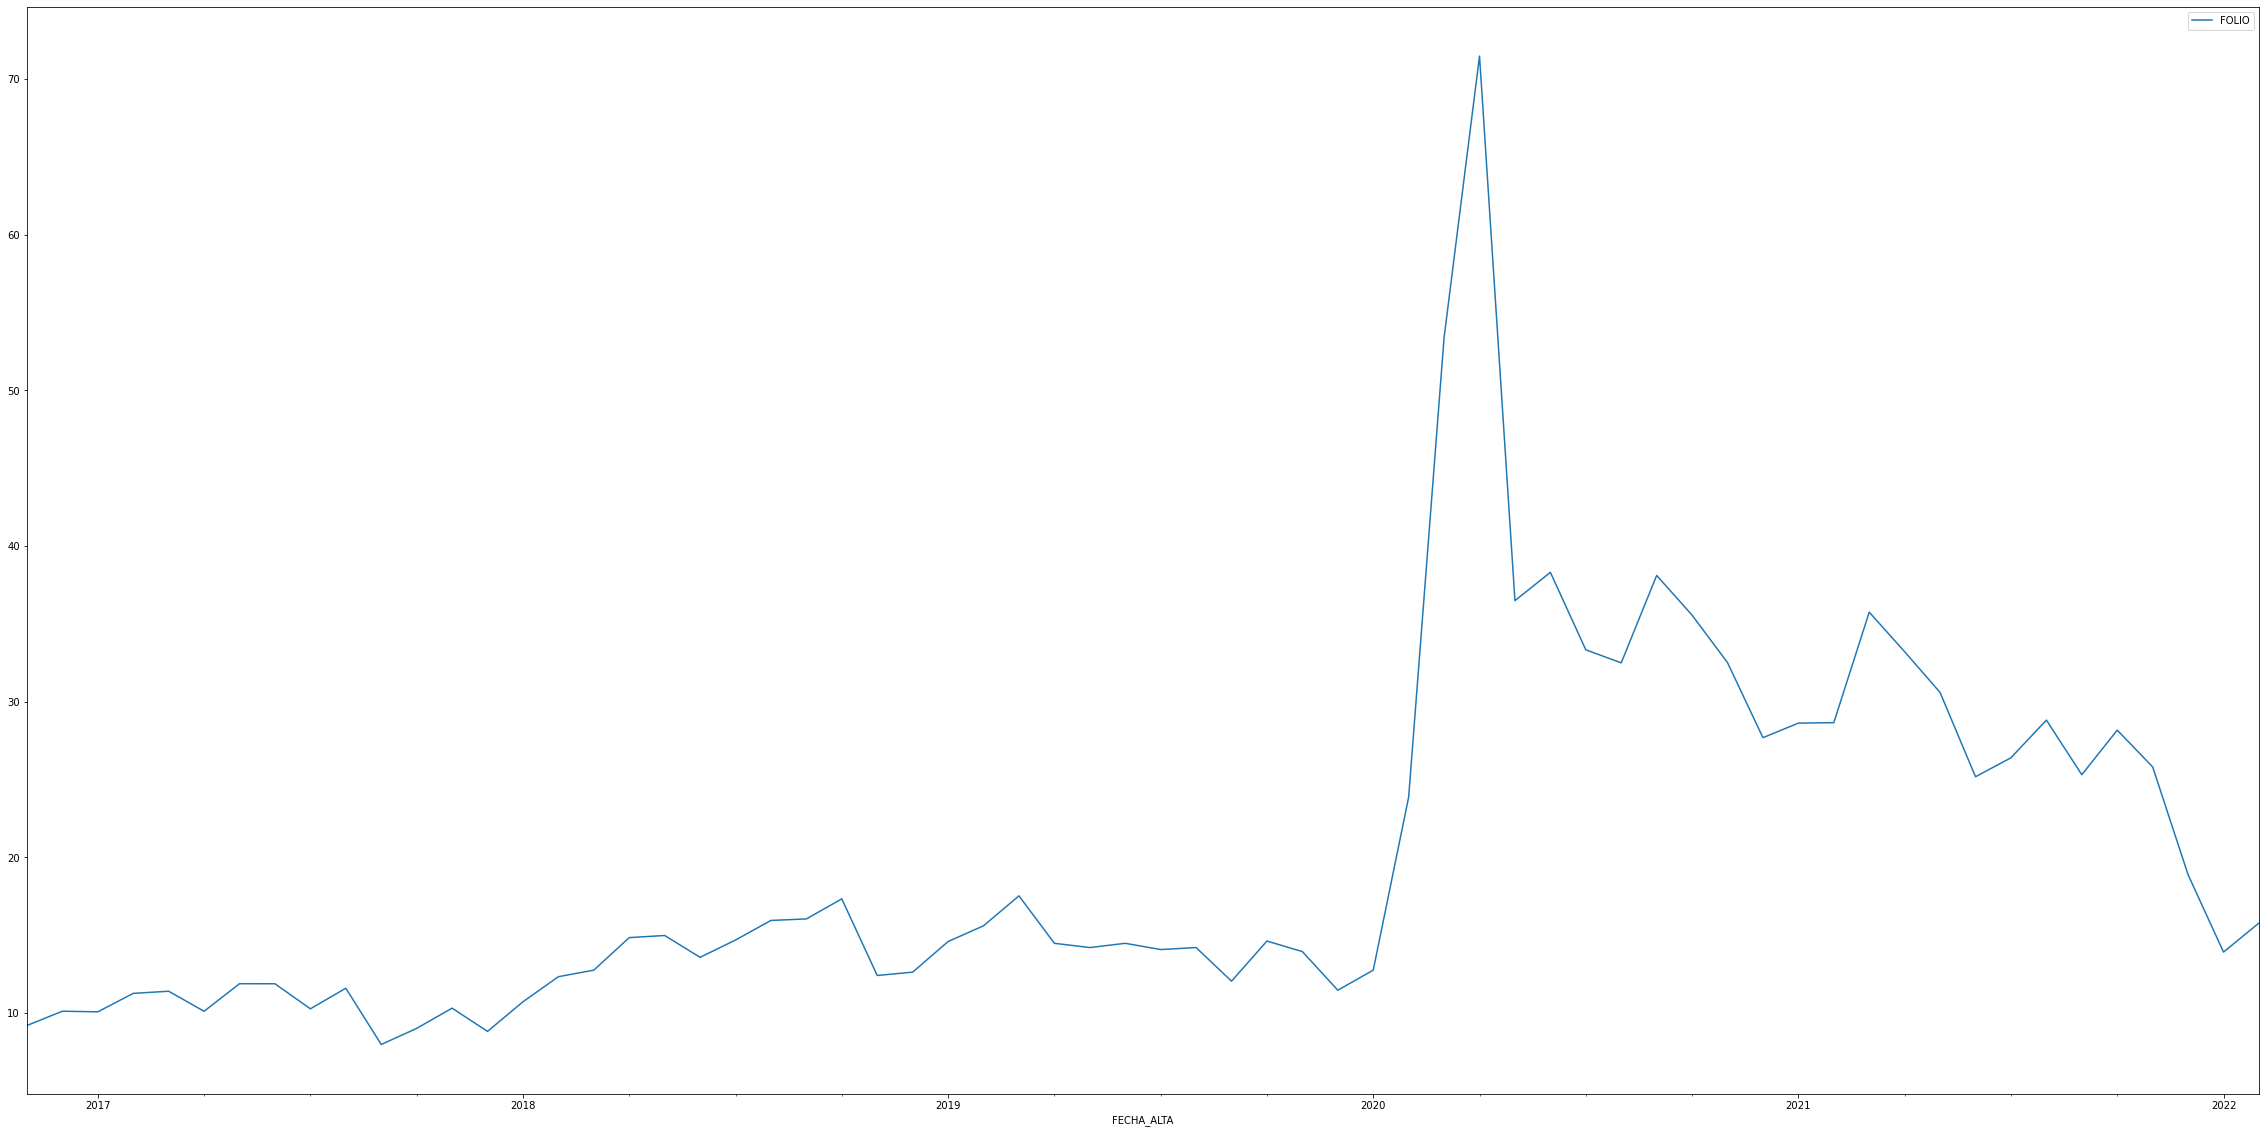

In [65]:
prom_llam_dm_vio.plot(figsize=(40,20))

In [405]:
llamadas_vio_bien=num_llamadas_vio.rolling(50).mean()

<AxesSubplot:xlabel='FECHA_ALTA'>

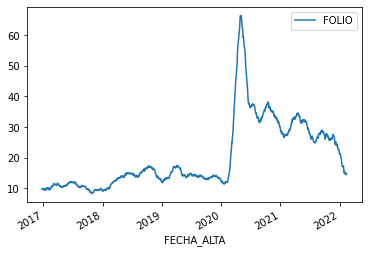

In [406]:
llamadas_vio_bien.plot()

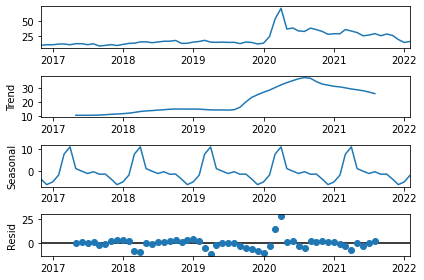

In [66]:

decomp_add1 = sm.tsa.seasonal_decompose(prom_llam_dm_vio)
decomp_add1.plot()
plt.show()

In [67]:
resultado2 = adfuller(prom_llam_dm_vio.FOLIO)

In [68]:
resultado2

(-2.4561346612712773,
 0.12651518495761088,
 0,
 63,
 {'1%': -3.5386953618719676,
  '5%': -2.9086446751210775,
  '10%': -2.591896782564878},
 355.3919409558992)

In [69]:
prueba_estacionaria = prom_llam_dm_vio.FOLIO - prom_llam_dm_vio.FOLIO.shift(1)

In [73]:
adfuller(prueba_estacionaria[1:])
#d=1

(-6.673570535098393,
 4.523789938583802e-09,
 1,
 61,
 {'1%': -3.542412746661615,
  '5%': -2.910236235808284,
  '10%': -2.5927445767266866},
 354.0932075728118)

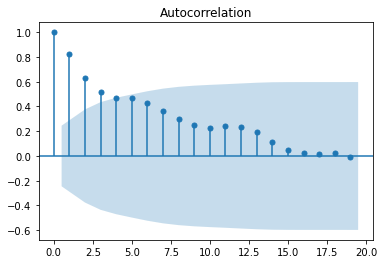

In [74]:
#q
auto_corr = plot_acf(prom_llam_dm_vio)

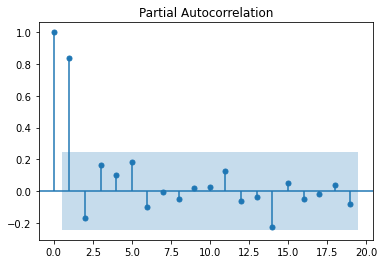

In [75]:
#p
partial_auto_corr = plot_pacf(prom_llam_dm_vio)

In [76]:
prom_llam_dms_vio=decomp_add1.seasonal

<AxesSubplot:xlabel='FECHA_ALTA'>

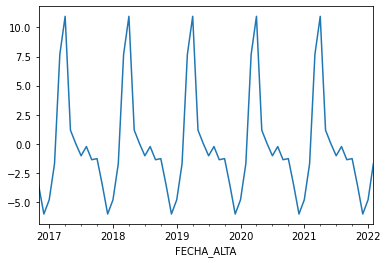

In [77]:
prom_llam_dms_vio.plot()

In [78]:
 adfuller(prom_llam_dms_vio)

(-4555628452242746.0,
 0.0,
 11,
 52,
 {'1%': -3.562878534649522,
  '5%': -2.918973284023669,
  '10%': -2.597393446745562},
 -3228.2135035115552)

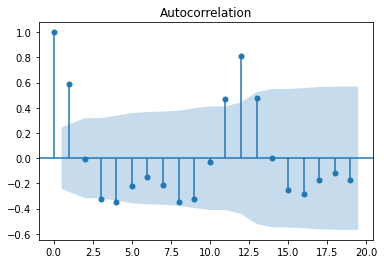

In [79]:
#Q
auto_corr = plot_acf(prom_llam_dms_vio)

C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


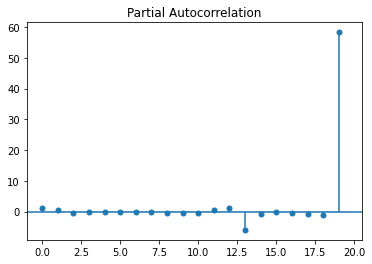

In [80]:
#P
partial_auto_corr = plot_pacf(prom_llam_dms_vio)

In [81]:
p= range(0,3)
d= range(0,2)
q= range(0,7)

In [82]:
pdq = list(product(p, d, q))
seasonal_pdq = [(p, d, q, 12) for p,d,q in pdq]

In [83]:
best_aic = None
for param in pdq:
    for param_estacional in seasonal_pdq:
        try:
            modelo = sm.tsa.statespace.SARIMAX(prom_llam_dm_vio.FOLIO,rest_viol_m
                                         order = param,
                                         seasonal_order = param_estacional,
                                         enforce_stationarity = False,
                                         enforce_invertibility = False)
            resultado = modelo.fit()
            if best_aic is None:
                print(f'SARIMAX:{param} x {param_estacional} - AIC:{resultado.aic}')
                best_aic = resultado.aic
            elif resultado.aic < best_aic:
                print(f'SARIMAX:{param} x {param_estacional} - AIC:{resultado.aic}')
                best_aic = resultado.aic
        except Exception as e:
            pass

SARIMAX:(0, 0, 0) x (0, 0, 0, 12) - AIC:577.9892630893214
SARIMAX:(0, 0, 0) x (0, 0, 1, 12) - AIC:452.6808914387574
SARIMAX:(0, 0, 0) x (0, 0, 2, 12) - AIC:351.5325216253004


C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMAX:(0, 0, 0) x (0, 0, 3, 12) - AIC:250.24895918215896
SARIMAX:(0, 0, 0) x (0, 0, 4, 12) - AIC:147.18220005566087
SARIMAX:(0, 0, 0) x (0, 0, 5, 12) - AIC:37.26211415321362
SARIMAX:(0, 0, 0) x (0, 0, 6, 12) - AIC:14.0
SARIMAX:(0, 0, 0) x (0, 1, 5, 12) - AIC:12.0


C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX:(0, 0, 0) x (3, 0, 5, 12) - AIC:-4.533289223501907


C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximu

SARIMAX:(0, 0, 1) x (2, 0, 5, 12) - AIC:-8.057898403991764


C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximu

C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximu

C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximu

C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximu

C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX:(1, 0, 0) x (2, 0, 5, 12) - AIC:-15.208653604159124


C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximu

C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximu

C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximu

C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximu

C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximu

C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximu

SARIMAX:(2, 0, 0) x (2, 0, 5, 12) - AIC:-25.862932889745814


C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximu

C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximu

C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximu

C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximu

C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximu

C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximu

C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximu

SARIMAX:(2, 1, 6) x (1, 0, 4, 12) - AIC:-26.55335802509633


C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximu

C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximu

C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximu

C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximu

C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximu

C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximu

C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximu

C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximu

C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximu

C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximu

In [105]:
num_llamadas_vio

NameError: name 'num_llamadas_vio' is not defined

In [339]:
rest_viol_d

,stringency_index
FECHA_ALTA,
2016-11-04,0.00
2016-11-05,0.00
2016-11-06,0.00
2016-11-07,0.00
2016-11-08,0.00
...,...
2022-02-09,35.19
2022-02-10,35.19
2022-02-11,35.19


In [351]:
locatel_rest

,stringency_index,FOLIO
FECHA_ALTA,,
2016-11-04,0.00,321.0
2016-11-05,0.00,233.0
2016-11-06,0.00,304.0
2016-11-07,0.00,388.0
2016-11-08,0.00,397.0
...,...,...
2022-02-09,35.19,622.0
2022-02-10,35.19,596.0
2022-02-11,35.19,561.0


In [354]:
locatel_rest.stringency_index=locatel_rest.stringency_index.fillna(0)

In [355]:
modelo1 = sm.tsa.statespace.SARIMAX(locatel_rest.FOLIO,exog=locatel_rest.stringency_index,
                                         order = (2, 0, 0),
                                         seasonal_order = (2, 0, 5, 12),
                                         enforce_stationarity = False,
                                         enforce_invertibility = False, )
resultados1 = modelo1.fit()
print(resultados1.summary())

C:\Users\Tania\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                            SARIMAX Results                                             
Dep. Variable:                                            FOLIO   No. Observations:                 1928
Model:             SARIMAX(2, 0, 0)x(2, 0, [1, 2, 3, 4, 5], 12)   Log Likelihood              -10929.581
Date:                                          Wed, 23 Mar 2022   AIC                          21881.161
Time:                                                  20:35:41   BIC                          21942.014
Sample:                                              11-04-2016   HQIC                         21903.583
                                                   - 02-13-2022                                         
Covariance Type:                                            opg                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------

In [327]:
resultados1.plot_diagnostics()
plt.show()

ValueError: Length of endogenous variable must be larger the the number of lags used in the model and the number of observations burned in the log-likelihood calculation.

<Figure size 432x288 with 0 Axes>